PyFieldImagerをインストールし、バージョンを確認します。

In [1]:
!pip install pyfieldimager

In [2]:
import pyfieldimager as pfi

pfi.__version__

'0.9.3.1'

画像をダウンロードします。

In [3]:
!wget https://github.com/nudoi/field/raw/refs/heads/main/image/20231018-orthophoto.tif

--2025-02-26 23:49:02--  https://github.com/nudoi/field/raw/refs/heads/main/image/20231018-orthophoto.tif
github.com (github.com) をDNSに問いあわせています... 20.27.177.113
github.com (github.com)|20.27.177.113|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 302 Found
場所: https://raw.githubusercontent.com/nudoi/field/refs/heads/main/image/20231018-orthophoto.tif [続く]
--2025-02-26 23:49:02--  https://raw.githubusercontent.com/nudoi/field/refs/heads/main/image/20231018-orthophoto.tif
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 18955884 (18M) [application/octet-stream]
`20231018-orthophoto.tif.1' に保存中

20231018-orthophoto 100%[===================>]  18.08M  45.5MB/s 時間 0.4s       

2025-02-26 23:49:03 (45.5 MB/s) - `20231018-orthophoto.tif.1' へ保存完了 [189558

In [4]:
!wget https://github.com/nudoi/field/raw/refs/heads/main/image/20231018-dsm.tif

--2025-02-26 23:49:03--  https://github.com/nudoi/field/raw/refs/heads/main/image/20231018-dsm.tif
github.com (github.com) をDNSに問いあわせています... 20.27.177.113
github.com (github.com)|20.27.177.113|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 302 Found
場所: https://raw.githubusercontent.com/nudoi/field/refs/heads/main/image/20231018-dsm.tif [続く]
--2025-02-26 23:49:04--  https://raw.githubusercontent.com/nudoi/field/refs/heads/main/image/20231018-dsm.tif
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 15878012 (15M) [application/octet-stream]
`20231018-dsm.tif.1' に保存中

20231018-dsm.tif.1  100%[===================>]  15.14M  65.2MB/s 時間 0.2s       

2025-02-26 23:49:04 (65.2 MB/s) - `20231018-dsm.tif.1' へ保存完了 [15878012/15878012]



In [5]:
!ls

20231018-dsm.tif           20231018-orthophoto.tif.1
20231018-dsm.tif.1         example-1.ipynb
20231018-orthophoto.tif


FieldImageオブジェクトを作成します。

In [6]:
orthophoto = '20231018-orthophoto.tif'
dsm = '20231018-dsm.tif'

# Create a new FieldImage object
fi = pfi.FieldImage(orthophoto=orthophoto, dsm=dsm)

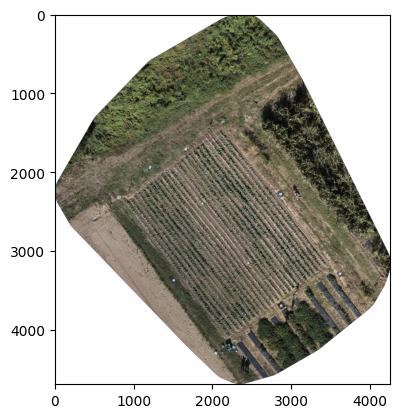

In [7]:
fi.show()

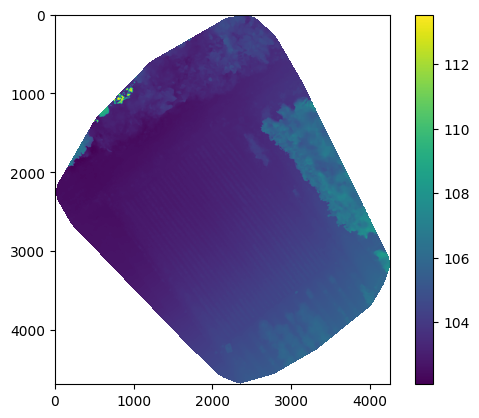

In [8]:
fi.show_dsm()

関心領域を選択します。

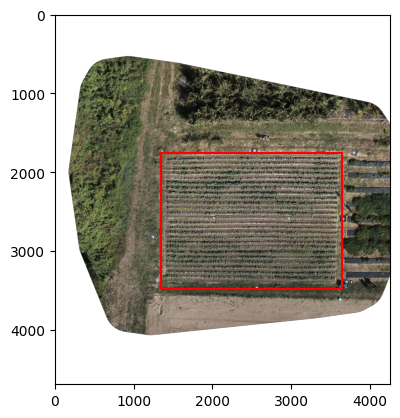

In [9]:
#fi.select_field() # GUI
fi.crop_field(rotation=52, x_range=[1350, 3650], y_range=[1750, 3480])

In [10]:
fi.update()

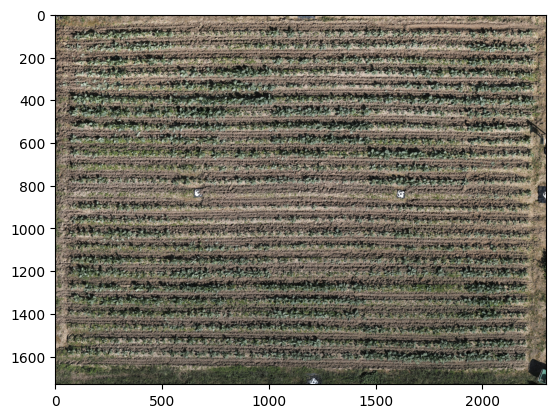

In [11]:
fi.show()

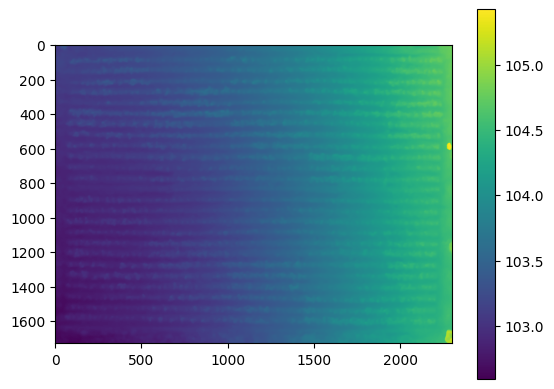

In [12]:
fi.show_dsm()

植生指標を選択します。

In [13]:
#fi.select_index() # GUI
fi.calc_index(index='SCI', threshold=0)

(array([[       nan,        nan, 0.00288184, ..., 0.06990881, 0.06395349,
         0.06666667],
        [       nan,        nan, 0.01565996, ..., 0.07100592, 0.06629834,
         0.08227848],
        [0.00396825,        nan, 0.01565996, ..., 0.06770833, 0.08333333,
         0.08227848],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
         0.03571429],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]]),
 -1,
 1)

In [14]:
fi.update()

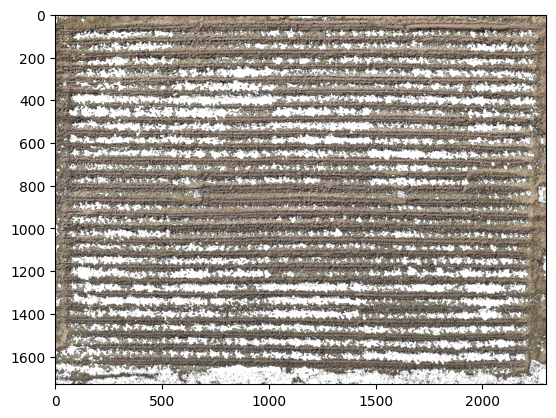

In [15]:
fi.show()

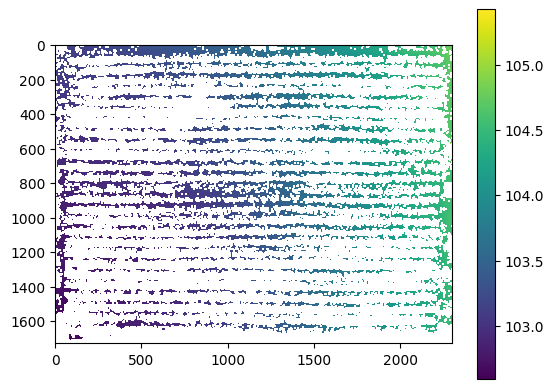

In [16]:
fi.show_dsm()

前の画像は以下で確認できます。

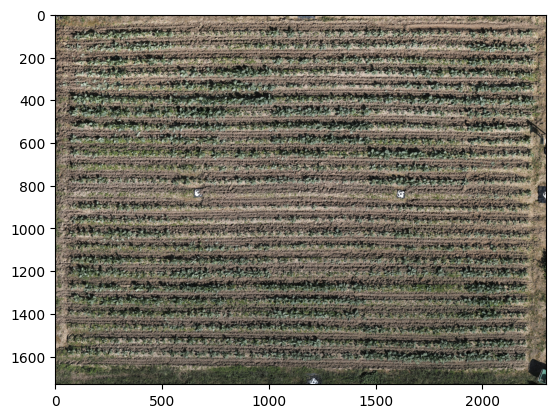

In [17]:
fi.show_full()

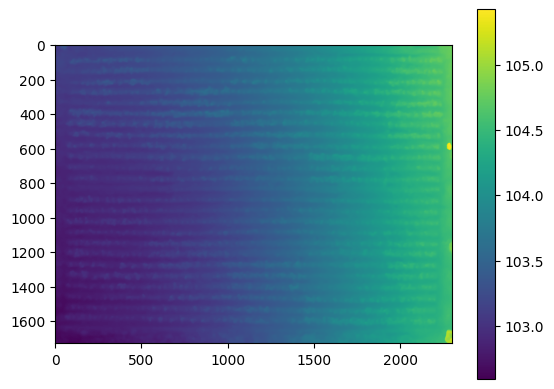

In [18]:
fi.show_dsm_full()

土壌のDSMからDTMを作成します。

In [19]:
fi.create_dtm(axis=1, method='spline', order=2)

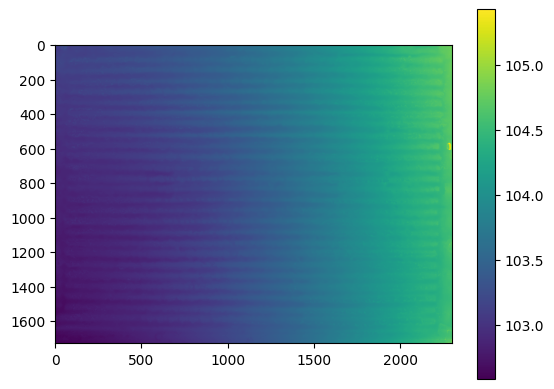

In [20]:
fi.show_dtm()

DSM-DTMでCHMを作成します。

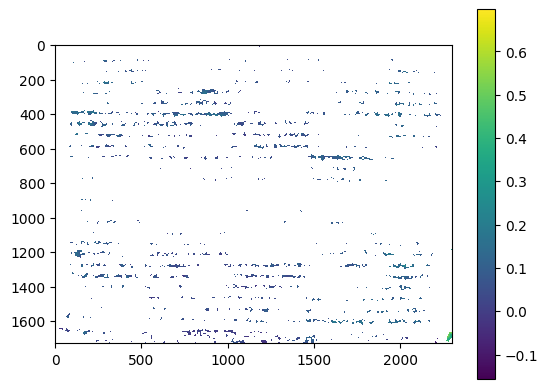

In [21]:
fi.create_chm()
fi.show_chm()

領域をグリットで分割します。

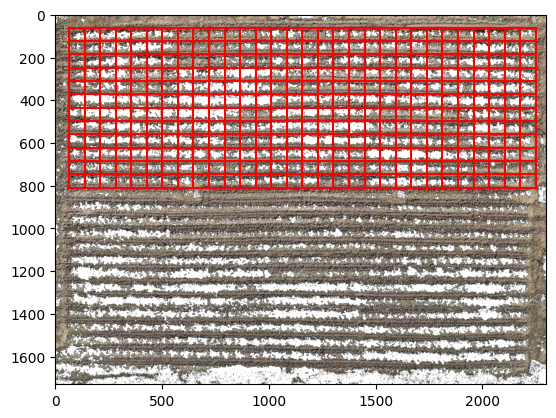

In [22]:
#fi.select_grid() # GUI
fi.crop_grid(rotation=0, x_range=[65, 2250], y_range=[60, 810], x_split=30, y_split=12)

In [23]:
field = fi.split()

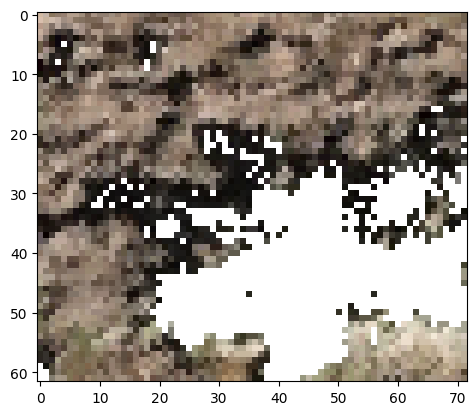

In [24]:
field[0][0].show()

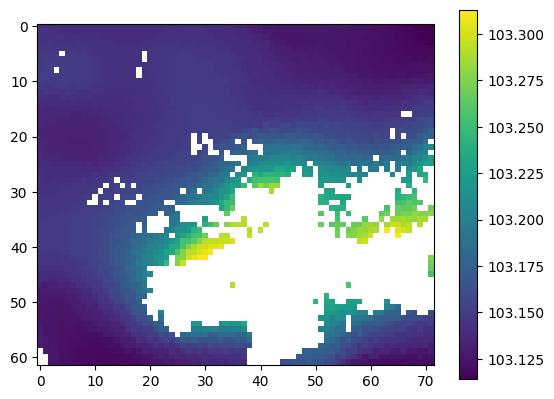

In [25]:
field[0][0].show_dsm()

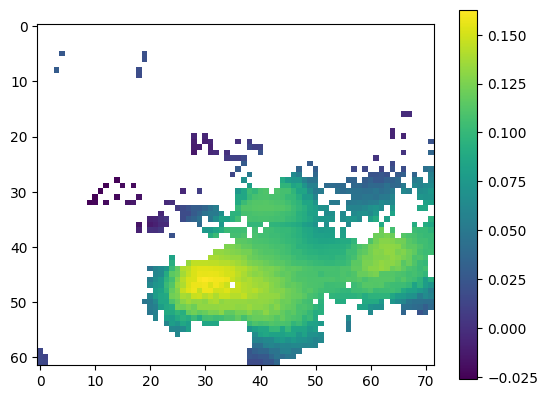

In [26]:
field[0][0].show_chm()

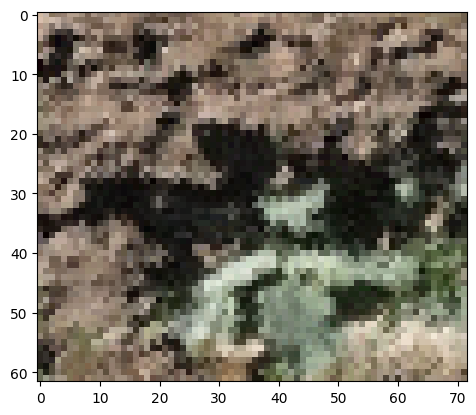

In [27]:
field[0][0].show_full()